<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/05_transfer_learning_series_of_Transfer_learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets create a series of TransferLearning Experiments we mean models


In [110]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2025-09-20 13:40:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.5’

10_food_classes_1_p 100%[===================>] 127.42M   343MB/s    in 0.4s    

2025-09-20 13:40:07 (343 MB/s) - ‘10_food_classes_1_percent.zip.5’ saved [133612354/133612354]



In [111]:
!wget https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-09-20 13:40:07--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py.5’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-09-20 13:40:07 (80.3 MB/s) - ‘helper_functions.py.5’ saved [6733/6733]



In [112]:
import tensorflow as tf

In [113]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [114]:
unzip_data('10_food_classes_1_percent.zip')

In [115]:
train_dir='10_food_classes_1_percent/train'
test_dir='10_food_classes_1_percent/test'

In [116]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'

In [117]:
image_shape=(512,512)

In [118]:
# Data Loader
train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',batch_size=32,image_size=image_shape)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',batch_size=32,image_size=image_shape)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [119]:
# create dataset augmentation stage with horizontal flip, rotation,zoom etc
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    # tf.keras.layers.Rescale(1./255), only for resnet and like models

],name='augmentation-layer')

Visualize Augmented data and also original images

In [120]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

(np.float64(-0.5), np.float64(579.5), np.float64(565.5), np.float64(-0.5))

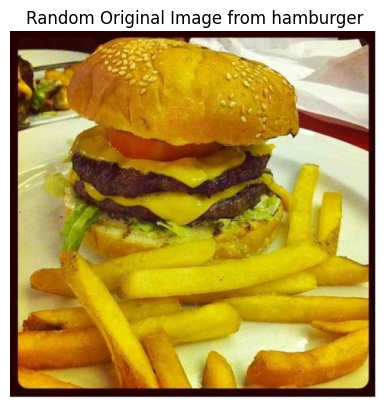

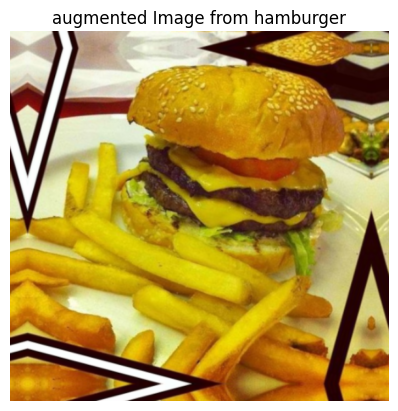

In [121]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf

target_class=random.choice(train_data_1_percent.class_names)
target_dir='10_food_classes_1_percent/train/'+target_class
random_image_name=random.choice(os.listdir(target_dir))
random_image_path=target_dir+'/'+random_image_name

# Load and display the original image
img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Random Original Image from {target_class}')
plt.axis('off')

# Now lets plot augmented Data
augmented_img=data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.title(f'augmented Image from {target_class}')
plt.imshow(tf.squeeze(augmented_img)/255)
plt.axis('off')

Model 1 Feature extraction transfer learning on 1% of the data

In [122]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

In [123]:
input_shape=(512,512,3)

In [124]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Input

In [125]:
inputs=Input(shape=input_shape)
# x=data_augmentation(inputs)
x=base_model(inputs,training=False)
x=GlobalAveragePooling2D(name='GlobalAveragePoolingLayer')(x)
outputs=Dense(10,activation='softmax')(x)

model_1=tf.keras.Model(inputs,outputs)

In [126]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [127]:
model_1.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 16, 16, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GlobalAveragePoolingLayer       │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [128]:
model_1_history=model_1.fit(train_data_1_percent,epochs=5,steps_per_epoch=len(train_data_1_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="transferlearning",experiment_name="Model1_FE_TF_1PERCENT_data")])

Saving TensorBoard log files to: transferlearning/Model1_FE_TF_1PERCENT_data/20250920-134014
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 11s/step - accuracy: 0.0631 - loss: 2.4676 - val_accuracy: 0.1365 - val_loss: 2.2735
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.1717 - loss: 2.1899 - val_accuracy: 0.2188 - val_loss: 2.1696
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3433 - loss: 1.9826 - val_accuracy: 0.2763 - val_loss: 2.0587
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5078 - loss: 1.8121 - val_accuracy: 0.3322 - val_loss: 1.9656
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6275 - loss: 1.6695 - val_accuracy: 0.4062 - val_loss: 1.8530


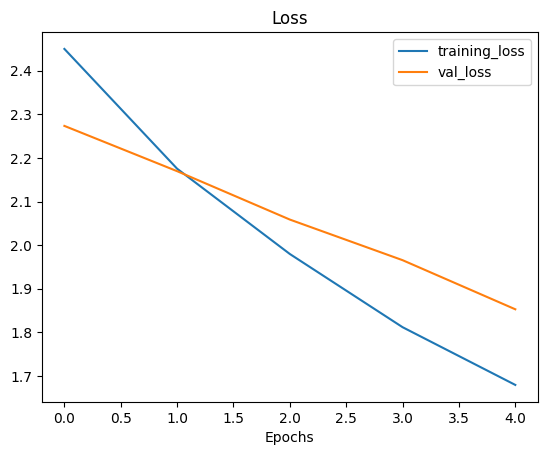

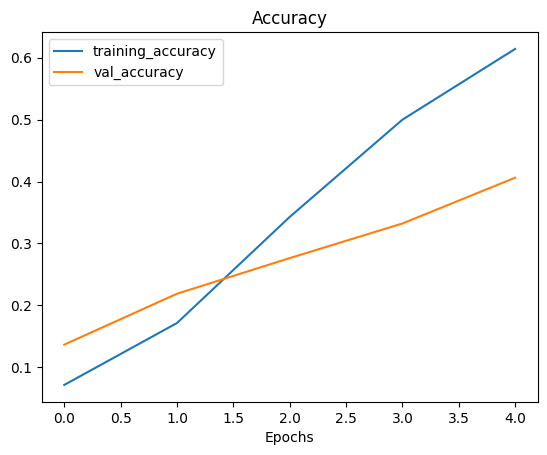

In [129]:
plot_loss_curves(model_1_history)

In [130]:
result_1_percent_data_augmented=model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 295ms/step - accuracy: 0.3927 - loss: 1.8704


In [131]:
result_1_percent_data_augmented

[1.858003854751587, 0.4108000099658966]